In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [28]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score




In [29]:
df=pd.read_csv("Laptop_price.csv")

In [30]:
df.head(5) 

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


In [31]:
df.sample(10)

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
677,Lenovo,2.510351,32,1000,12.422508,2.252766,33009.991821
88,Asus,3.499790,4,256,12.226643,3.996096,9454.453849
171,Dell,2.242804,32,256,16.309786,4.269003,10314.433877
321,HP,3.693652,4,256,14.189464,4.026864,9480.671472
533,Acer,2.745489,16,256,14.697887,4.234210,9848.921198
801,Lenovo,1.698548,8,1000,15.934968,4.424203,31646.723385
425,HP,1.877645,4,256,12.584026,4.983746,8570.012950
538,HP,3.936983,16,1000,16.857122,3.321617,32525.794685
695,HP,2.433129,4,512,15.046398,2.264456,17073.491966
664,Lenovo,2.484661,8,512,14.120444,4.735456,16845.480995


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [33]:
df.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


In [34]:
df["Brand"].value_counts()

Brand
Dell      210
Asus      206
Acer      204
Lenovo    190
HP        190
Name: count, dtype: int64

In [35]:
df=pd.get_dummies(df,columns=["Brand"])

In [36]:
df

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price,Brand_Acer,Brand_Asus,Brand_Dell,Brand_HP,Brand_Lenovo
0,3.830296,16,512,11.185147,2.641094,17395.093065,False,True,False,False,False
1,2.912833,4,1000,11.311372,3.260012,31607.605919,True,False,False,False,False
2,3.241627,4,256,11.853023,2.029061,9291.023542,False,False,False,False,True
3,3.806248,16,512,12.280360,4.573865,17436.728334,True,False,False,False,False
4,3.268097,32,1000,14.990877,4.193472,32917.990718,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,3.343584,4,1000,12.587095,3.162399,31593.668017,False,False,False,True,False
996,2.780555,8,256,12.679356,3.750265,9149.521832,False,False,True,False,False
997,3.200569,4,512,12.666315,3.392612,16552.404779,False,False,True,False,False
998,1.604182,8,256,11.215581,3.857613,9407.473459,False,True,False,False,False


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Processor_Speed   1000 non-null   float64
 1   RAM_Size          1000 non-null   int64  
 2   Storage_Capacity  1000 non-null   int64  
 3   Screen_Size       1000 non-null   float64
 4   Weight            1000 non-null   float64
 5   Price             1000 non-null   float64
 6   Brand_Acer        1000 non-null   bool   
 7   Brand_Asus        1000 non-null   bool   
 8   Brand_Dell        1000 non-null   bool   
 9   Brand_HP          1000 non-null   bool   
 10  Brand_Lenovo      1000 non-null   bool   
dtypes: bool(5), float64(4), int64(2)
memory usage: 51.9 KB


In [40]:
x= df.drop(["Price"],axis=1)

In [41]:
x

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Brand_Acer,Brand_Asus,Brand_Dell,Brand_HP,Brand_Lenovo
0,3.830296,16,512,11.185147,2.641094,False,True,False,False,False
1,2.912833,4,1000,11.311372,3.260012,True,False,False,False,False
2,3.241627,4,256,11.853023,2.029061,False,False,False,False,True
3,3.806248,16,512,12.280360,4.573865,True,False,False,False,False
4,3.268097,32,1000,14.990877,4.193472,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,3.343584,4,1000,12.587095,3.162399,False,False,False,True,False
996,2.780555,8,256,12.679356,3.750265,False,False,True,False,False
997,3.200569,4,512,12.666315,3.392612,False,False,True,False,False
998,1.604182,8,256,11.215581,3.857613,False,True,False,False,False


In [44]:
y=round(df["Price"],2)

In [51]:
y.shape

(1000,)

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [57]:
len(y_train)

800

In [58]:
model=LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [60]:
lrmodel=model.predict(x_test)

In [61]:
r2_score(y_test,lrmodel)

0.9996442067525764

In [68]:
models={'Linear Regression':LinearRegression(),
       "Ridge ": Ridge(),
       "Lasso": Lasso(),
       "Support_vector":SVR(),
       "RF Regression": RandomForestRegressor()}

In [75]:
results={}
for models_name,model in models.items():
    #print(model)
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)

    MAE=mean_absolute_error(y_test,prediction)
    MSE=mean_squared_error(y_test,prediction)
    R2=r2_score(y_test,prediction)


    results[models_name]={
        "MAE": MAE,
        "MSE": MSE,
        "R2_Score": R2
    
    
    }

In [77]:
for model_name , result in results.items():

    print(f"{model_name}:")
    print(f"  Mean Absolute Error (MAE): {result['MAE']:.3f}")
    print(f"  Mean Squared Error (MSE): {result['MSE']:.3f}")
    print(f"  R-squared (R2): {result['R2_Score']:}")
    print("-" * 50)

Linear Regression:
  Mean Absolute Error (MAE): 146.225
  Mean Squared Error (MSE): 32304.800
  R-squared (R2): 0.9996442067525764
--------------------------------------------------
Ridge :
  Mean Absolute Error (MAE): 146.222
  Mean Squared Error (MSE): 32302.873
  R-squared (R2): 0.999644227983986
--------------------------------------------------
Lasso:
  Mean Absolute Error (MAE): 145.898
  Mean Squared Error (MSE): 32180.040
  R-squared (R2): 0.9996455808187066
--------------------------------------------------
Support_vector:
  Mean Absolute Error (MAE): 7816.307
  Mean Squared Error (MSE): 91754708.940
  R-squared (R2): -0.010552781847977144
--------------------------------------------------
RF Regression:
  Mean Absolute Error (MAE): 166.151
  Mean Squared Error (MSE): 40563.770
  R-squared (R2): 0.9995532454884823
--------------------------------------------------


In [79]:
best_model_name = max(results, key=lambda k: results[k]['R2_Score'])  
best_model = models[best_model_name]
print(f"Best Model is {best_model_name}")

Best Model is Lasso


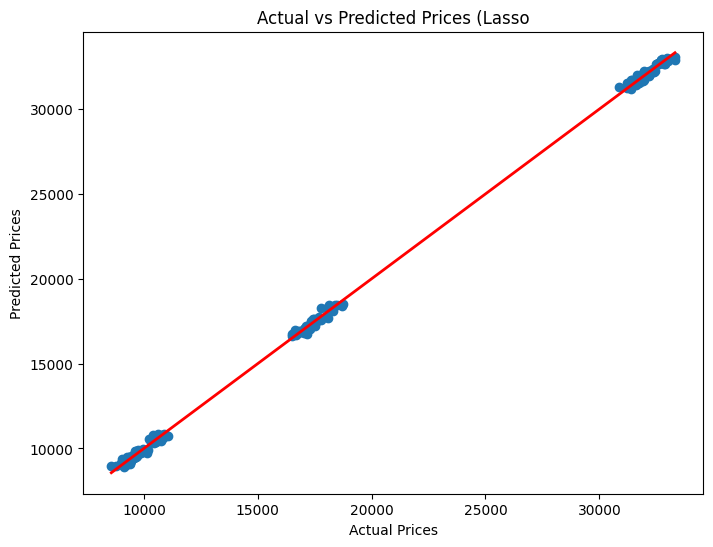

In [81]:
y_pred_best = best_model.predict(x_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title(f'Actual vs Predicted Prices ({best_model_name}')
plt.show()

In [82]:
import pickle

In [86]:
filename="savemodel.sav"
pickle.dump(best_model,open(filename,'wb'))

In [87]:
load_model= pickle.load(open(filename,"rb"))

In [85]:
load_model.predict([(3.830296,16,512,11.185147,2.641094,0,1,0,0,0)])

C:\Users\91968\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([17626.32913813])